# Exploring chi square contours

I find that the chi2 results for detector number 4 are largely inconsistent with the rest.
As such I am dropping detector #4 in the results presented in the paper.

In [1]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour
import matplotlib.pyplot as plt
from bin.coadd_analysis_module import compare_spectra
from bin.coadd_bhm_analysis_module import compare_spectra as bhm_compare_spectra
%matplotlib inline


In [2]:
# def example_wrapper(example="6", correct=None, mode="iam", snr=150, chi2_val="chi2_123", dof=4, x="teff_1", y="teff_2"):

In [3]:
def example_wrapper(example="6", correct=None, mode="iam", snr=150, chi2_val="chi2_123", dof=4, x="teff_1", y="teff_2"):
    """Contour plots for each example"""
    ex_base ="/home/jneal/Phd/Analysis/Paper_examples/Example6/analysis"
    
    sim_example = SingleSimReader(base=ex_base,
                       name="Example{0}{1}".format(example,snr), mode=mode, chi2_val=chi2_val)

    extractor = DBExtractor(sim_example.get_table())

    df_min = extractor.minimum_value_of(chi2_val)

    if mode == "iam":
        cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
            chi2_val, 'teff_1','logg_1', 'feh_1']
        fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
        df = extractor.fixed_extraction(cols, fixed, limit=-1)
        df.head()
        lim_params = ["teff_1", "teff_2", "gamma", "rv"]
        lim_params.remove(x)
        lim_params.remove(y)
        df_contour(df, x, y, chi2_val, df_min, lim_params, correct=correct, dof=dof)
        plt.show()
        #df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct, dof=dof)
        #plt.show()
        #df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct, dof=dof)
    elif mode == "bhm":
        cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']
        fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
        df = extractor.fixed_extraction(cols, fixed, limit=-1)
        df.head()

        df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct, dof=2)
        plt.show()

In [4]:
chi2_val = "chi2_123"

In [7]:
correct_vals = {"6":{"teff_1":5800, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
                       "teff_2": 4000, "logg_2": 5.0, "feh_2": 0.0,  "rv":20},
               "9": {"teff_1":5700, "logg_2": 4.5, "feh_1": 0.0, "gamma":6.6,
           "teff_2": 3200, "logg_2": 5.0, "feh_2": 0.0,  "rv":0.5, "obsnum":1},
               "8": {"teff_1":5700, "logg_2": 4.5, "feh_1": 0.0, "gamma":6.6,
           "teff_2": 3200, "logg_2": 5.0, "feh_2": 0.0,  "rv":0.5, "obsnum":1},}

In [8]:
EX = 6
SNR = 500


#EX 6 - A sun like star with a 4000K companion. (M-dwarf)

In [9]:
CORRECT = correct_vals.get(str(EX), None)

In [ ]:
MODE = "bhm"
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_1", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_2", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_3", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_4", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="coadd_chi2", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_123", dof=4)

In [13]:
MODE="iam"

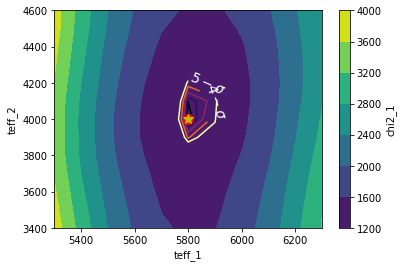

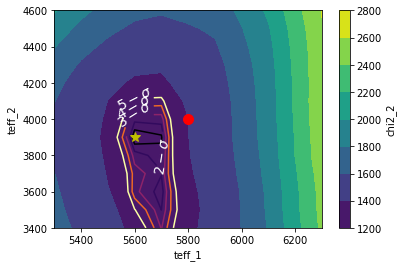

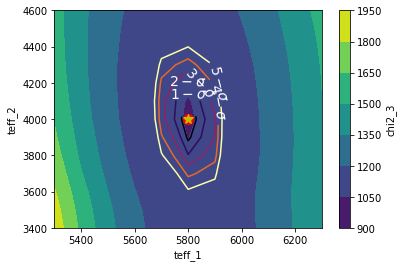

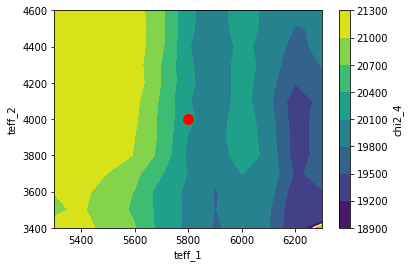

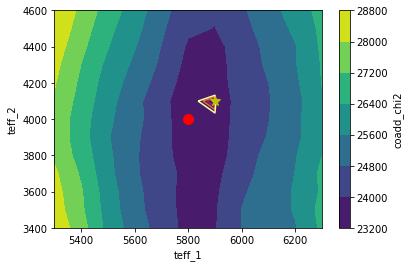

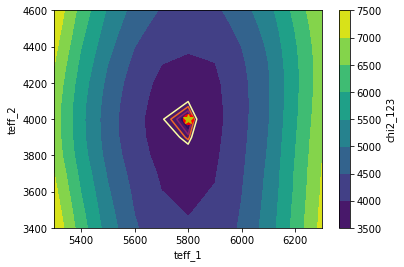

In [14]:
# Analyse teff_1 teff_2 contours for each chip

example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_1", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_2", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_3", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_4", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="coadd_chi2", dof=4)
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_123", dof=4)

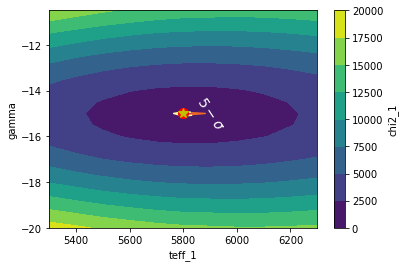

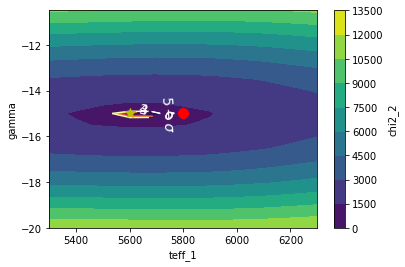

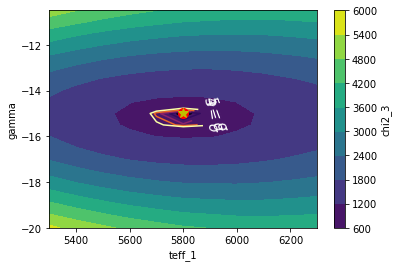

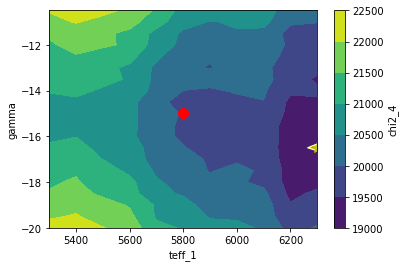

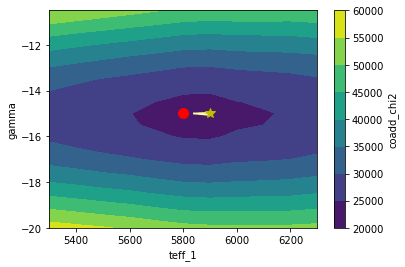

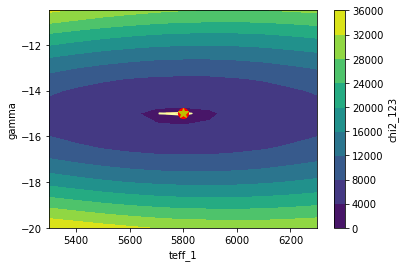

In [15]:
# Analyse teff_1 gamma contours for each chip
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_1", dof=4, y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_2", dof=4, y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_3", dof=4, y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_4", dof=4, y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="coadd_chi2", dof=4, y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=SNR, chi2_val="chi2_123", dof=4, y="gamma")

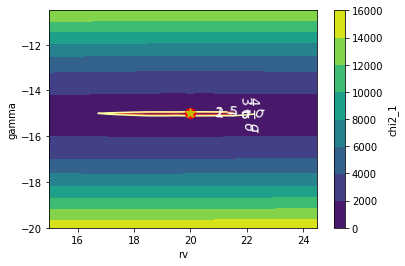

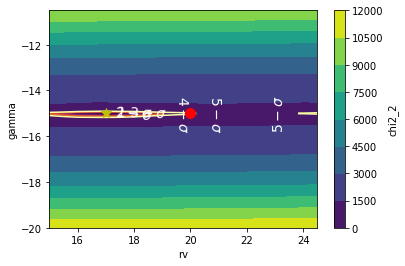

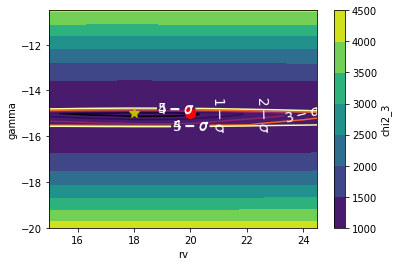

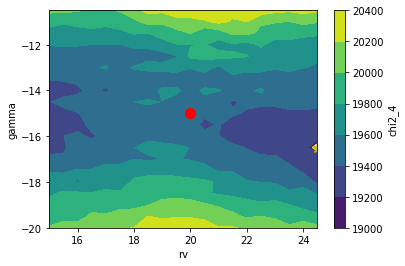

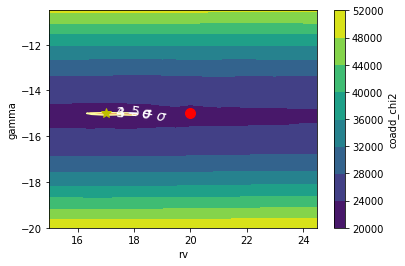

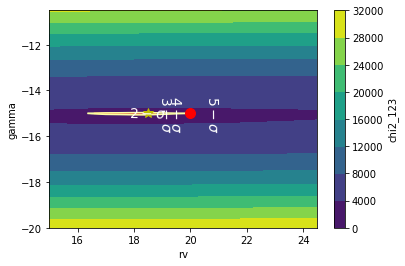

In [16]:
# Analyse rv gamma contours for each chip
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_1", dof=4, x="rv", y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_2", dof=4, x="rv", y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_3", dof=4, x="rv", y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_4", dof=4, x="rv", y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="coadd_chi2", dof=4, x="rv", y="gamma")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_123", dof=4, x="rv", y="gamma")

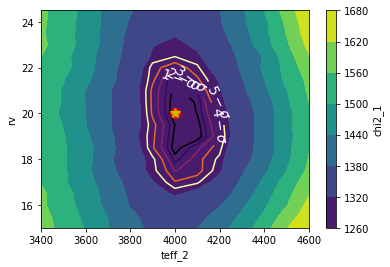

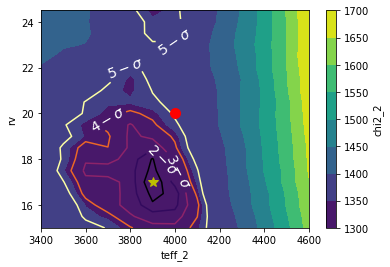

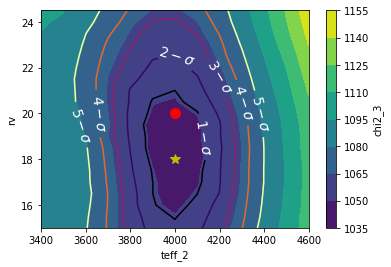

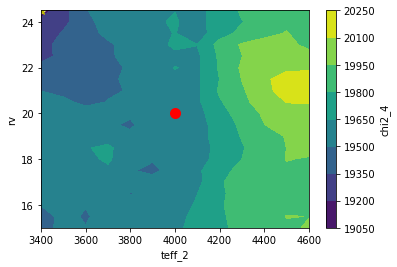

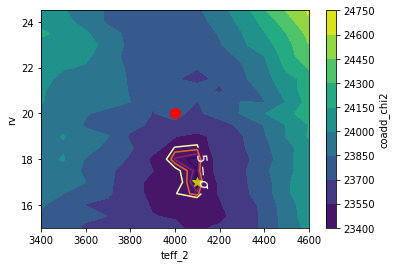

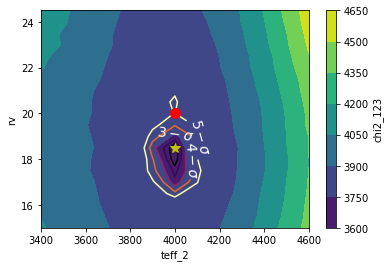

In [17]:
# Analyse rv gamma contours for each chip
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_1", dof=4, x="teff_2", y="rv")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_2", dof=4, x="teff_2", y="rv")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_3", dof=4, x="teff_2", y="rv")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_4", dof=4, x="teff_2", y="rv")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="coadd_chi2", dof=4, x="teff_2", y="rv")
example_wrapper(example=EX, correct=CORRECT, mode=MODE, snr=150, chi2_val="chi2_123", dof=4, x="teff_2", y="rv")